<a href="https://colab.research.google.com/github/Diksha-Bora/Machine_Learning/blob/main/Email_Detection44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/spam.csv")
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.value_counts()

Label  EmailText                                                                                                                                                                                                    
ham    Sorry, I'll call later                                                                                                                                                                                           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                              12
       Ok...                                                                                                                                                                                                            10
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed Ã¥

In [ ]:
data.describe()

,Label,EmailText
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
print("Shape of data is:",data.shape)

Shape of data is: (5572, 2)


In [ ]:
data.isna().sum()

Label        0
EmailText    0
dtype: int64

In [ ]:
data["EmailText"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

**REMOVING NULL OR REDUNDANT VALUES**

In [ ]:
data.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [ ]:
data = data.drop_duplicates()
data.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.duplicated().value_counts()

False    5169
dtype: int64

**DATA VISUALIZATION**

In [ ]:
df = data.copy()
df.head()

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['num_characters'] = df['EmailText'].apply(len)
df['num_words'] = df['EmailText'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['EmailText'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Label,EmailText,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='Label', ylabel='count'>

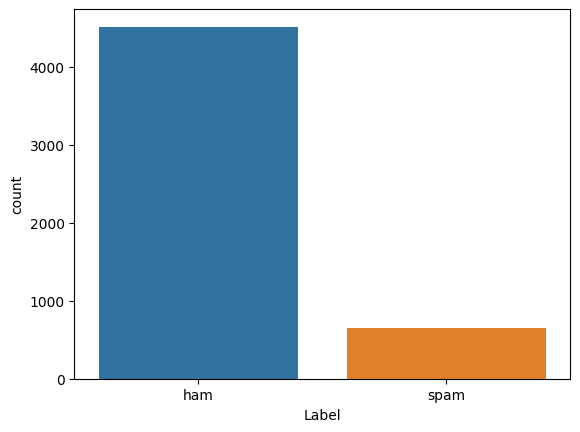

In [ ]:
sns.countplot(df, x = "Label")

Here, we can see that the quantity of spam is relatively less than ham messages.

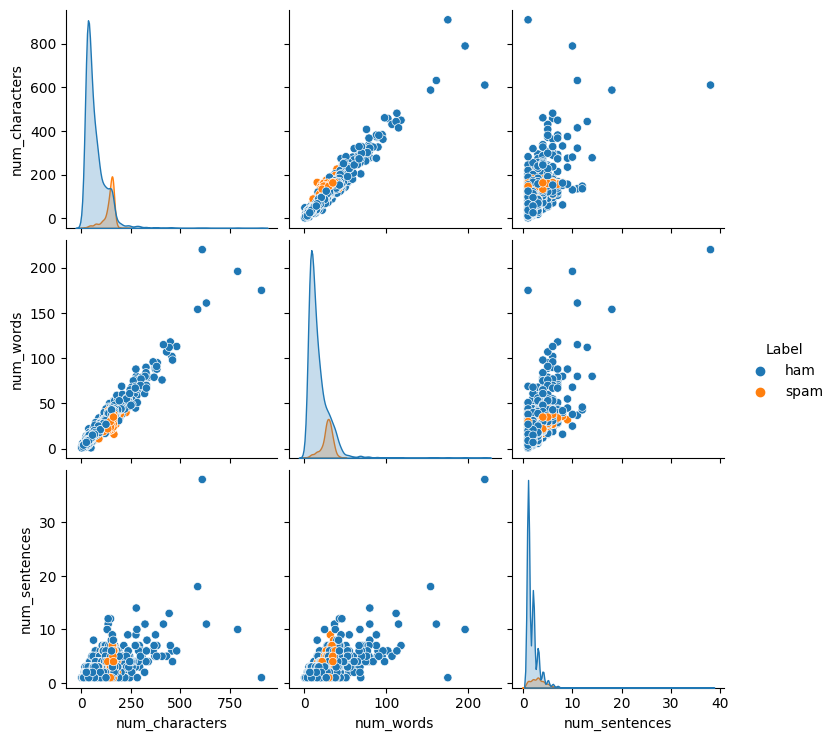

In [ ]:
sns.pairplot(df, hue="Label")

<Axes: >

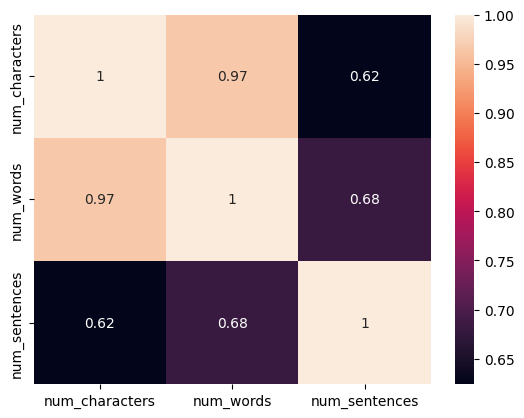

In [ ]:
sns.heatmap(df.corr(),annot = True)

**DATA PREPROCESSING**

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords_list = list(stopwords.words('english'))
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
import string
punctuation_ls = list(string.punctuation)
print(punctuation_ls)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
from nltk.stem import PorterStemmer
pstem =PorterStemmer()

In [ ]:
# Step 1: remove al punctuation marks

def remove_punctuation(x):
    for i in punctuation_ls:
        x = x.replace(i, "")
    return x

# Step 2: convert to lower case
def convert_lowercase(x):
    return x.lower()

# Step 3: Tokennization
def tokenization(x):
    return word_tokenize(x)

#step 4: remove stop words
def remove_stopwords(tok_x):
    res = []

    for word in tok_x:
        if word not in stopwords_list:
            res.append(word)
    return res

# step 5: stemming/lemmatization
def stemming_words(ls_x):
    res = []
    for i in range(0, len(ls_x)):
        res.append(pstem.stem(ls_x[i]))
    return res


In [ ]:
def pre_processing(x):
    x = remove_punctuation(x)
    x = convert_lowercase(x)
    x = tokenization(x)
    x = remove_stopwords(x)
    x = stemming_words(x)
    x = " ".join(x)

    return x

In [ ]:
x = "I am playing football. Can i go home?"
pre_processing(x)

'play footbal go home'

In [ ]:
data["Processed_EmailText"] = data["EmailText"].apply(pre_processing)

In [ ]:
data.head(10)

,Label,EmailText,Processed_EmailText
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darl 3 week word back id like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request mell mell oru minnaminungint nurun...
8,spam,WINNER!! As a valued network customer you have...,winner valu network custom select receivea ã¥â...
9,spam,Had your mobile 11 months or more? U R entitle...,mobil 11 month u r entitl updat latest colour ...


In [ ]:
data = data.drop("EmailText",axis=1)

In [ ]:
data.head()

,Label,Processed_EmailText
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


In [ ]:
data["Label"] = data["Label"].map({"ham":1, "spam":0})

In [ ]:
data.head()

,Label,Processed_EmailText
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri 2 wkli comp win fa cup final tkt 21...
3,1,u dun say earli hor u c alreadi say
4,1,nah dont think goe usf live around though


**COUNT VECTORIZER**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
x_vc = count_vec.fit_transform(data["Processed_EmailText"]).toarray()

In [ ]:
x_vc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
x_tf = tf_idf.fit_transform(data["Processed_EmailText"]).toarray()

**TRAIN-TEST SPLIT FOR COUNT-VECTORIZER**

In [ ]:
y = data["Label"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_vc,y, test_size=0.5, random_state=45, stratify =y)

**MODEL SELECTION**

In [ ]:
from sklearn.svm import SVC
svm = SVC()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=rfc)
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=svm)

**GRID-SEARCH CV : HYPER-PARAMETER TUNING**

**SVC**

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'kernel': ['rbf', 'sigmoid'], 'gamma': ['scale', 'auto'],
                     'C': [1, 1.5, 2, 5, 10, 100]}

model = GridSearchCV(estimator=SVC(), param_grid=tuned_parameters, scoring = "f1", cv = 5)

model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 1.5, 2, 5, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1')

In [ ]:
model.best_estimator_

SVC(C=5, kernel='sigmoid')

In [ ]:
svm = SVC(C=5, kernel='sigmoid')
svm.fit(x_train,y_train)

SVC(C=5, kernel='sigmoid')

In [ ]:
ypred_train = svm.predict(x_train)
ypred_test = svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train))
print("TEST\n")
print(classification_report(y_test, ypred_test))

TRAIN

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       326
           1       0.99      0.99      0.99      2258

    accuracy                           0.99      2584
   macro avg       0.97      0.97      0.97      2584
weighted avg       0.99      0.99      0.99      2584

TEST

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       327
           1       0.98      0.99      0.98      2258

    accuracy                           0.97      2585
   macro avg       0.95      0.91      0.93      2585
weighted avg       0.97      0.97      0.97      2585



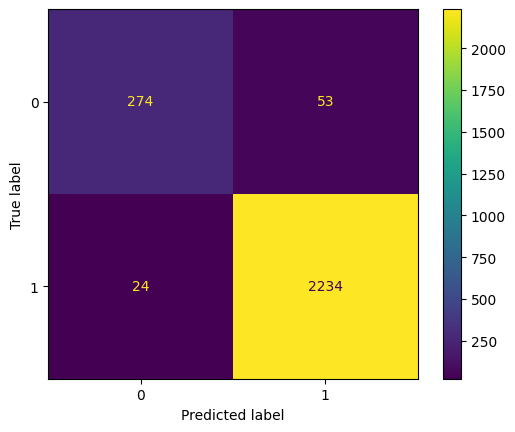

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test)

**RANDOM FOREST CLASSIFIER**

In [ ]:
parameters = {'criterion':("gini", "entropy", "log_loss"),
              'max_depth':(5,7,8,10),
              'bootstrap':(True, False),
              'random_state':(45,12,85,35),
              'warm_start':(True, False)}

In [ ]:
from sklearn.model_selection import GridSearchCV
model1 = GridSearchCV(estimator = rfc , param_grid = parameters, n_jobs=-1)

In [276]:
model1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': (True, False),
                         'criterion': ('gini', 'entropy', 'log_loss'),
                         'max_depth': (5, 7, 8, 10),
                         'random_state': (45, 12, 85, 35),
                         'warm_start': (True, False)})

In [277]:
model1.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=45,
                       warm_start=True)

In [278]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=10, random_state=45,
                       warm_start=True)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, random_state=45,
                       warm_start=True)

In [279]:
ypred_train1 = rfc.predict(x_train)
ypred_test1 = rfc.predict(x_test)

In [280]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train1))
print("TEST\n")
print(classification_report(y_test, ypred_test1))

TRAIN

              precision    recall  f1-score   support

           0       1.00      0.29      0.45       326
           1       0.91      1.00      0.95      2258

    accuracy                           0.91      2584
   macro avg       0.95      0.65      0.70      2584
weighted avg       0.92      0.91      0.89      2584

TEST

              precision    recall  f1-score   support

           0       1.00      0.19      0.31       327
           1       0.89      1.00      0.94      2258

    accuracy                           0.90      2585
   macro avg       0.95      0.59      0.63      2585
weighted avg       0.91      0.90      0.86      2585



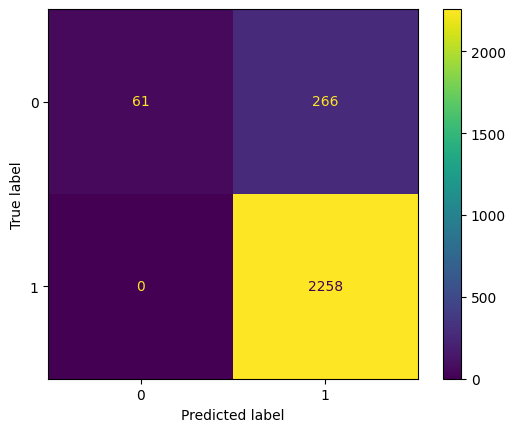

In [281]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rfc, x_test, y_test)

**BAGGING CLASSIFIER**

In [282]:
param = {"n_estimators":(7,5,2),
         "max_samples":(5,12),
         "bootstrap":(True,False),
         "warm_start":(True,False),
         }

In [283]:
from sklearn.model_selection import GridSearchCV
model2 = GridSearchCV(estimator = bc , param_grid = param, n_jobs=-1)
model2.fit(x_train,y_train)
model2.best_estimator_

BaggingClassifier(bootstrap=False, max_samples=12, n_estimators=2,
                  warm_start=True)

In [ ]:
bc = BaggingClassifier(max_samples=12, n_estimators=2, warm_start=True)
bc.fit(x_train,y_train)

In [ ]:
ypred_train2 = bc.predict(x_train)
ypred_test2 = bc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train2))
print("TEST\n")
print(classification_report(y_test, ypred_test2))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(bc, x_test, y_test)

**ADABOOST CLASSIFIER**

In [ ]:
param2 = { ("n_estimators"):(50,10,12),
          ("learning_rate"):(1.0,1.2,0.3),
          ("random_state"):(45,52,20)}

In [ ]:
from sklearn.model_selection import GridSearchCV
model3 = GridSearchCV(estimator = abc , param_grid = param2, n_jobs=-1)
model3.fit(x_train,y_train)
model3.best_estimator_

In [ ]:
abc = AdaBoostClassifier(learning_rate=1.2, random_state=45)

In [291]:
abc.fit(x_train,y_train)
ypred_train3 = abc.predict(x_train)
ypred_test3 = abc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train3))
print("TEST\n")
print(classification_report(y_test, ypred_test3))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(abc, x_test, y_test)

**DECISION TREE CLASSIFIER**

In [ ]:
param3 ={ ("criterion"):("gini", "entropy", "log_loss"),
         ("max_depth"):(10,12,7),
          ("random_state"):(10,45,23)
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model4 = GridSearchCV(estimator = dtc , param_grid = param3, n_jobs=-1)
model4.fit(x_train,y_train)
model4.best_estimator_

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=23)

In [ ]:
dtc.fit(x_train,y_train)
ypred_train4 = dtc.predict(x_train)
ypred_test4 = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train4))
print("TEST\n")
print(classification_report(y_test, ypred_test4))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dtc, x_test, y_test)

**GRADIENT BOOSTING CLASSIFIER**

In [300]:
param4 = {("loss"):("log_loss", "deviance", "exponential"),
          ("learning_rate"):(1.2,2.0,0.6),
          ("criterion"):("friedman_mse", "squared_error")
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model5 = GridSearchCV(estimator = gbc , param_grid = param4, n_jobs=-1)
model5.fit(x_train,y_train)
model5.best_estimator_

In [ ]:
gbc = GradientBoostingClassifier(criterion='squared_error', learning_rate=2.0,
                           loss='exponential')

In [ ]:
gbc.fit(x_train,y_train)
ypred_train5 = gbc.predict(x_train)
ypred_test5 = gbc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train5))
print("TEST\n")
print(classification_report(y_test, ypred_test5))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gbc, x_test, y_test)

**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
ypred_train6 = lr.predict(x_train)
ypred_test6 = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train6))
print("TEST\n")
print(classification_report(y_test, ypred_test6))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

**MULTINOMIALNB**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

In [ ]:
ypred_train7 = mnb.predict(x_train)
ypred_test7 = mnb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train7))
print("TEST\n")
print(classification_report(y_test, ypred_test7))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mnb, x_test, y_test)

**TRAIN-TEST SPLIT FOR TFIDF-VECTORIZER**

In [ ]:
y = data["Label"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x_tf,y, test_size=0.5, random_state=45, stratify =y)

**MODEL SELECTION**

**GRID-SEARCH CV : HYPER-PARAMETER TUNING**

**SVC**

In [ ]:
svm = SVC()
svm.fit(x_train,y_train)

In [ ]:
ypred_train = svm.predict(x_train)
ypred_test = svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train))
print("TEST\n")
print(classification_report(y_test, ypred_test))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test)

**ADABOOST CLASSIFIER**

In [ ]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

In [ ]:
ypred_train1 = abc.predict(x_train)
ypred_test1 = abc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train1))
print("TEST\n")
print(classification_report(y_test, ypred_test1))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(abc, x_test, y_test)

**GRADIENT BOOSTING CLASSIFIER**

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

In [ ]:
ypred_train2 = gbc.predict(x_train)
ypred_test2 = gbc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train2))
print("TEST\n")
print(classification_report(y_test, ypred_test2))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gbc, x_test, y_test)

**LOGISTIC REGRESSION**

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

In [ ]:
ypred_train3 = lr.predict(x_train)
ypred_test3 = lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train5))
print("TEST\n")
print(classification_report(y_test, ypred_test5))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)

**MULTINOMIALNB**

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

In [ ]:
ypred_train4 = mnb.predict(x_train)
ypred_test4 = mnb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print("TRAIN\n")
print(classification_report(y_train, ypred_train4))
print("TEST\n")
print(classification_report(y_test, ypred_test4))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mnb, x_test, y_test)